In [10]:
#imports
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

train = pd.read_csv("/content/DataQuest Dataset - train_data.csv")
test = pd.read_csv(r"/content/DataQuest Dataset - test_data.csv")

In [12]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(train['MealPlan'])
encoded1 = encoder.fit_transform(test['MealPlan'])
encoded2 = encoder.fit_transform(train['RoomType'])
encoded3 = encoder.fit_transform(test['RoomType'])
encoded4 = encoder.fit_transform(train['MarketSegment'])
encoded5 = encoder.fit_transform(test['MarketSegment'])
encoded6 = encoder.fit_transform(train['BookingStatus'])
encoded7 = encoder.fit_transform(test['BookingStatus'])

# replace the original 'Meal Plan' column with the encoded values
train['MealPlan'] = encoded
test['MealPlan'] = encoded1
train['RoomType'] = encoded2
test['RoomType'] = encoded3
train['MarketSegment'] = encoded4
test['MarketSegment'] = encoded5
train['BookingStatus'] = encoded6
test['BookingStatus'] = encoded7

train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)



In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train['CancelRatio'] = train['NumPrevCancellations'] / (train['NumPreviousNonCancelled'] + train['NumPrevCancellations'])
train['CancelRatio'] = train['CancelRatio'].replace(np.nan, 0)
train['NumGuests'] = train['NumAdults'] + train['NumChildren']
train['Nights'] = train['NumWeekendNights'] + train['NumWeekNights']

train['Date'] = pd.to_datetime(train['ArrivalYear'].astype(str) + '-' + train['ArrivalMonth'].astype(str).str.zfill(2) + '-' + train['ArrivalDate'].astype(str).str.zfill(2), errors='coerce')
cat_features = ['MealPlan', 'Parking', 'RoomType', 'MarketSegment', 'RepeatedGuest']

# create the transformer for one-hot encoding
# calculate number of days since first date
train = train.sort_values(by='Date')
first_date = train['Date'].iloc[0]
train['DaysSinceFirst'] = (train['Date'] - first_date).dt.days


train.replace([np.inf, -np.inf], np.nan, inplace=True)
train=train.dropna()
x = train.loc[:, (train.columns != 'BookingStatus') & (train.columns != 'BookingID') & (train.columns != 'Date')]
y = train.BookingStatus # Target variable

In [14]:
#test train and x,y split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
CT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_features)],remainder='passthrough')
x_train = CT.fit_transform(x_train)
x_test = CT.transform(x_test)

In [15]:
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
lr_model.fit(x_train, y_train)

# Predict the labels of the test set
y_pred = lr_model.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8060250661147522


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred, average = "binary", pos_label=1)
recall_score(y_test, y_pred, pos_label=1)
f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8060250661147522
Recall: 0.8913043478260869
Precision: 0.8319220322735261
F1 Score: 0.8605900338814974


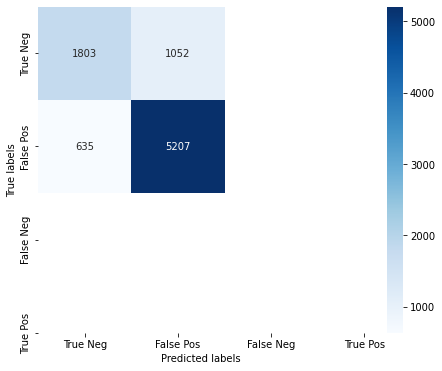

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# define the labels for the confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']

# create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax, square=True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



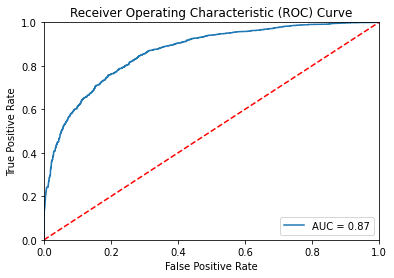

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# make predictions on test data
y_pred_proba = lr_model.predict_proba(x_test)[:,1]

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
